### A Case Study on Heart Disease
    
by Ryker Dolese

<h1><center>Machine Learning Heart Disease Prediction</center></h1>

## Introduction
Heart disease, also known as cardiovascular disease, is a term used to describe a range of conditions that affect the heart and blood vessels. It is the leading cause of death in the United States, accounting for approximately 1 in every 4 deaths. The most common type of heart disease is coronary artery disease, which is caused by a buildup of plaque in the arteries that supply blood to the heart. Other types of heart disease include heart failure, arrhythmias, and heart valve problems. Risk factors for heart disease include high blood pressure, high cholesterol, smoking, diabetes, obesity, and a family history of heart disease. While heart disease is a serious condition, many cases can be prevented through lifestyle changes such as regular exercise, healthy eating, and not smoking.

Early detection and management are critical for individuals with cardiovascular disease or those at high risk due to factors such as hypertension, diabetes, hyperlipidemia, or established disease. Utilizing a machine learning model can greatly assist in this process.

In this project, we try to predict Heart Disease with several different models.
Our first goal is to do some basic data cleaning and exploration. Let's make some standard imports and read in our data!

In [1]:
### standard imports
import numpy as np
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = (8,6)
import seaborn as sns
from sklearn import neighbors

import warnings
warnings.filterwarnings('ignore')
np.random.seed(2023)

Only one [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) was used for the project. 

According to Kaggle: "This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes." The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

Final dataset: 918 observations

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


*Let's understand the data*

This heart failure dataset is based on some features such as,

1. Age : Age of the patient
2. Sex : Gender of the patient
3. ChestPainType : 4 types of chest pain is provided in this dataset

- ATA (Atypical angina): Chest pain that is not typical of angina, such as sharp, stabbing or burning pain that may be located in areas other than the chest.

- NAP (Non-anginal pain): Chest pain that is not caused by reduced blood flow to the heart, but may still be related to heart disease. The pain may be sharp, stabbing, or burning and may be caused by conditions such as inflammation of the chest wall, acid reflux, or anxiety.

- ASY (Asymptomatic): Patients who do not experience any chest pain or discomfort related to their heart condition, but may still have abnormal results on diagnostic tests indicating the presence of heart disease.

- TA (Typical angina): Chest pain that is described as a discomfort or pressure in the chest that is provoked by physical exertion or emotional stress and relieved by rest or medication. The pain is typically substernal (behind the breastbone) and may radiate to the neck, jaw, shoulders, arms, or back.

4. RestingBP : Refers to the measurement of blood pressure when the body is at rest, and the individual is sitting or lying down. It is measured in millimeters of mercury (mmHg)

5. Cholesterol : Refers to the cholesterol in blood and it is expressed in milligrams per deciliter (mg/dL)

6. FastingBS : Fasting blood sugar (BS) refers to the level of glucose in the blood after an overnight fast of at least 8 hours.It is expressed in milligrams per deciliter (mg/dL). In this dataset, fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG : Resting ECG (Electrocardiogram) is a medical test that records the electrical activity of the heart while a person is at rest.

8. MaxHR : MaxHR stands for maximum heart rate and refers to the highest number of times your heart beats in one minute during intense physical activity.

9. ExcerciseAngina : Refers to chest pain or discomfort that occurs during physical activity or exertion.

10. OldPeak : Oldpeak is a measure of the amount of ST depression on an electrocardiogram (ECG) during exercise. ST depression is a sign of reduced blood flow to the heart muscle and is associated with a higher risk of coronary artery disease.

11. STslope : ST slope refers to the direction and magnitude of the ST segment deviation from he baseline on an electrocardiogram (ECG).

12. HeartDisease: a value of 1 means the patient has heart disease and value of 0 means the opposite.

In [144]:
print(heart.shape) # 918 patient entries, 12 columns of criteria

print(heart.columns) #let's see the column names... any renaming needed?

print(heart.dtypes) # numerical and categorical Data

heart.isna().sum() # no missing values! but some cholesterol values are 0??

(918, 12)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have 918 patients with 12 columns of criteria that we can look at. There are no missing values, so not much data cleaning or wrangling needs to be happen. However, if we look closer at the data, there are patients with a Cholesterol value of 0, which doesn't make sense. Let's look into that. We have two options: fill the values or drop the rows. We don't want to get rid of valuable data, so let's fill in those values with the average. It alters our data slightly but shouldn't make a large difference in the grand scheme of things.

In [145]:
heart[heart['Cholesterol']==0] # find values where Cholesterol = 0

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [146]:
heart.loc[heart['Cholesterol']==0,'Cholesterol'] = np.average(heart['Cholesterol']) 
# change 0 Cholestrol levels to the average

### Univariate Analysis
Let's see how heart disease differs among gender in our data. 

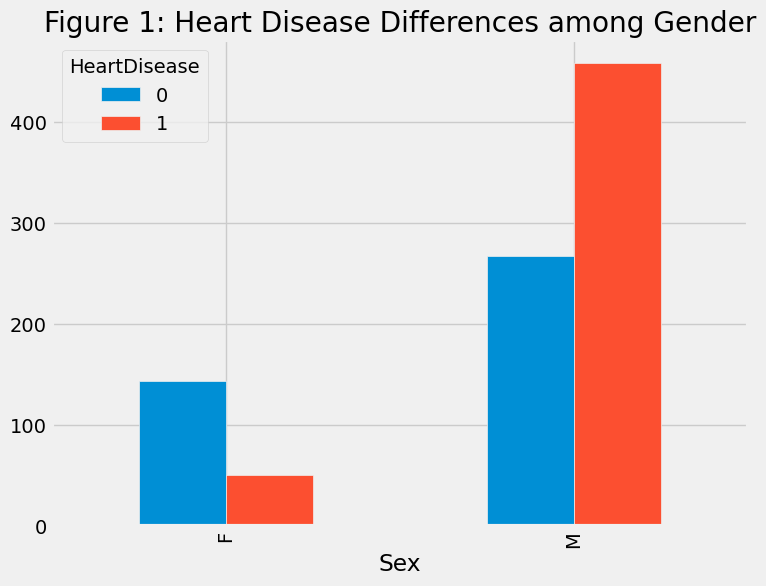

In [147]:
heart.pivot_table(index = 'Sex', columns='HeartDisease', 
                  values = 'RestingECG', aggfunc='count').plot(kind='bar', style='sns');
plt.title('Figure 1: Heart Disease Differences among Gender');
# pivot table let's us see distribution of heart disease in our data

How do our numerical variables differ among gender? Let's look at some seaborn boxplots:

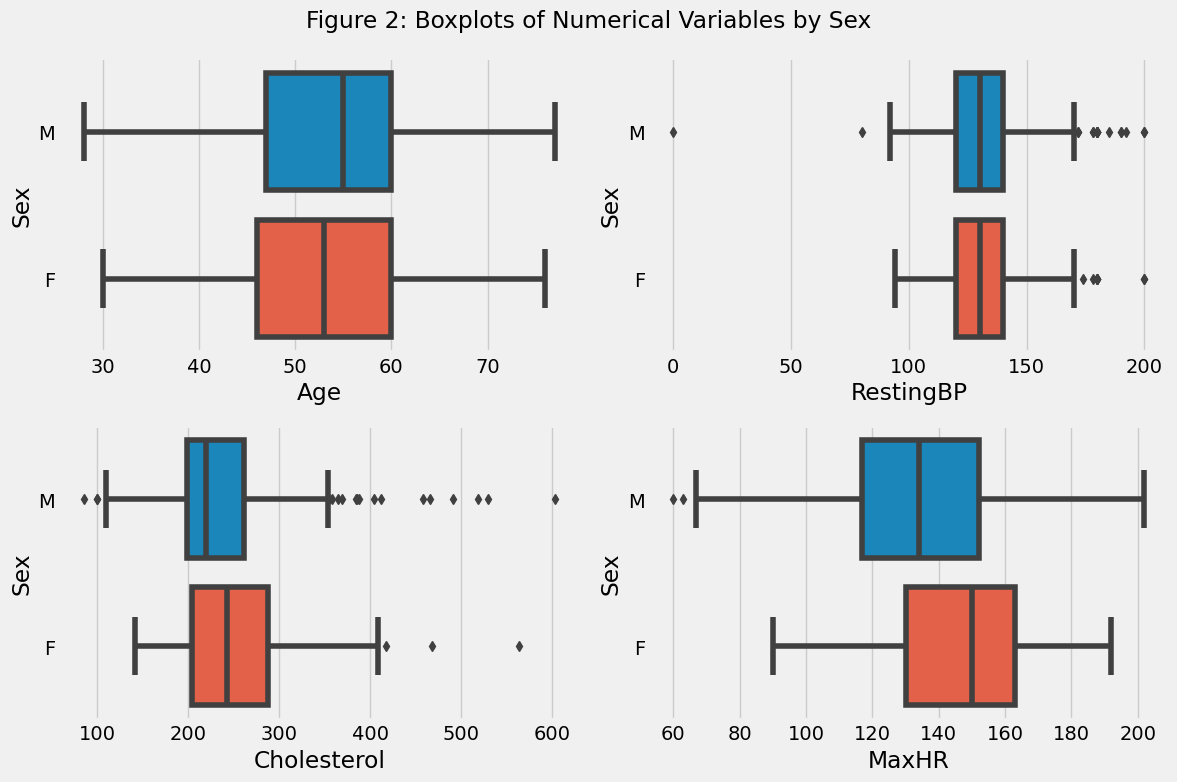

In [148]:
numerical_vars= ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

def num_boxplots(rows, cols, variables):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    axes = axes.flatten() # convert axes array to 1D array for easier iteration

    # Iterate through each numerical variable and plot corresponding boxplot
    for i, var in enumerate(variables):
        sns.boxplot(data=heart, y='Sex', x=var, ax=axes[i])
        axes[i].set_xlabel(var)

    # Add overall title to the figure
    fig.suptitle('Figure 2: Boxplots of Numerical Variables by Sex')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

num_boxplots(rows=2, cols=2, variables=numerical_vars)


### Some Thoughts:
- The ages and resting blood pressure of men and women in our data set are found to be very similar. This suggests that age and resting blood pressure may not be key factors in distinguishing between male and female patients with cardiovascular disease. However, further analysis is needed to fully understand the implications of these similarities.
- Although cholesterol levels in women tend to be slightly lower than in men, this difference is not particularly significant. This indicates that while there may be some gender-based differences in cholesterol levels, they are not significant enough to be clinically relevant in the context of cardiovascular disease diagnosis and management.
- MaxHR, or maximum heart rate, exhibits a larger variation in our data set and tends to be lower for men. This could be due to differences in physical activity levels between men and women, with men typically engaging in more high-intensity exercise that would result in a higher maxHR. Alternatively, it may be that women have naturally higher maxHR, although further research is needed to confirm this hypothesis.

### Bivariate Analysis
#### Finding Predictive Measures
We need to find the variables that are most strongly related to heart disease.
Let's use a seaborn pairplot to find which measures seem to best distinguish those with heart disease and those without heart disease.

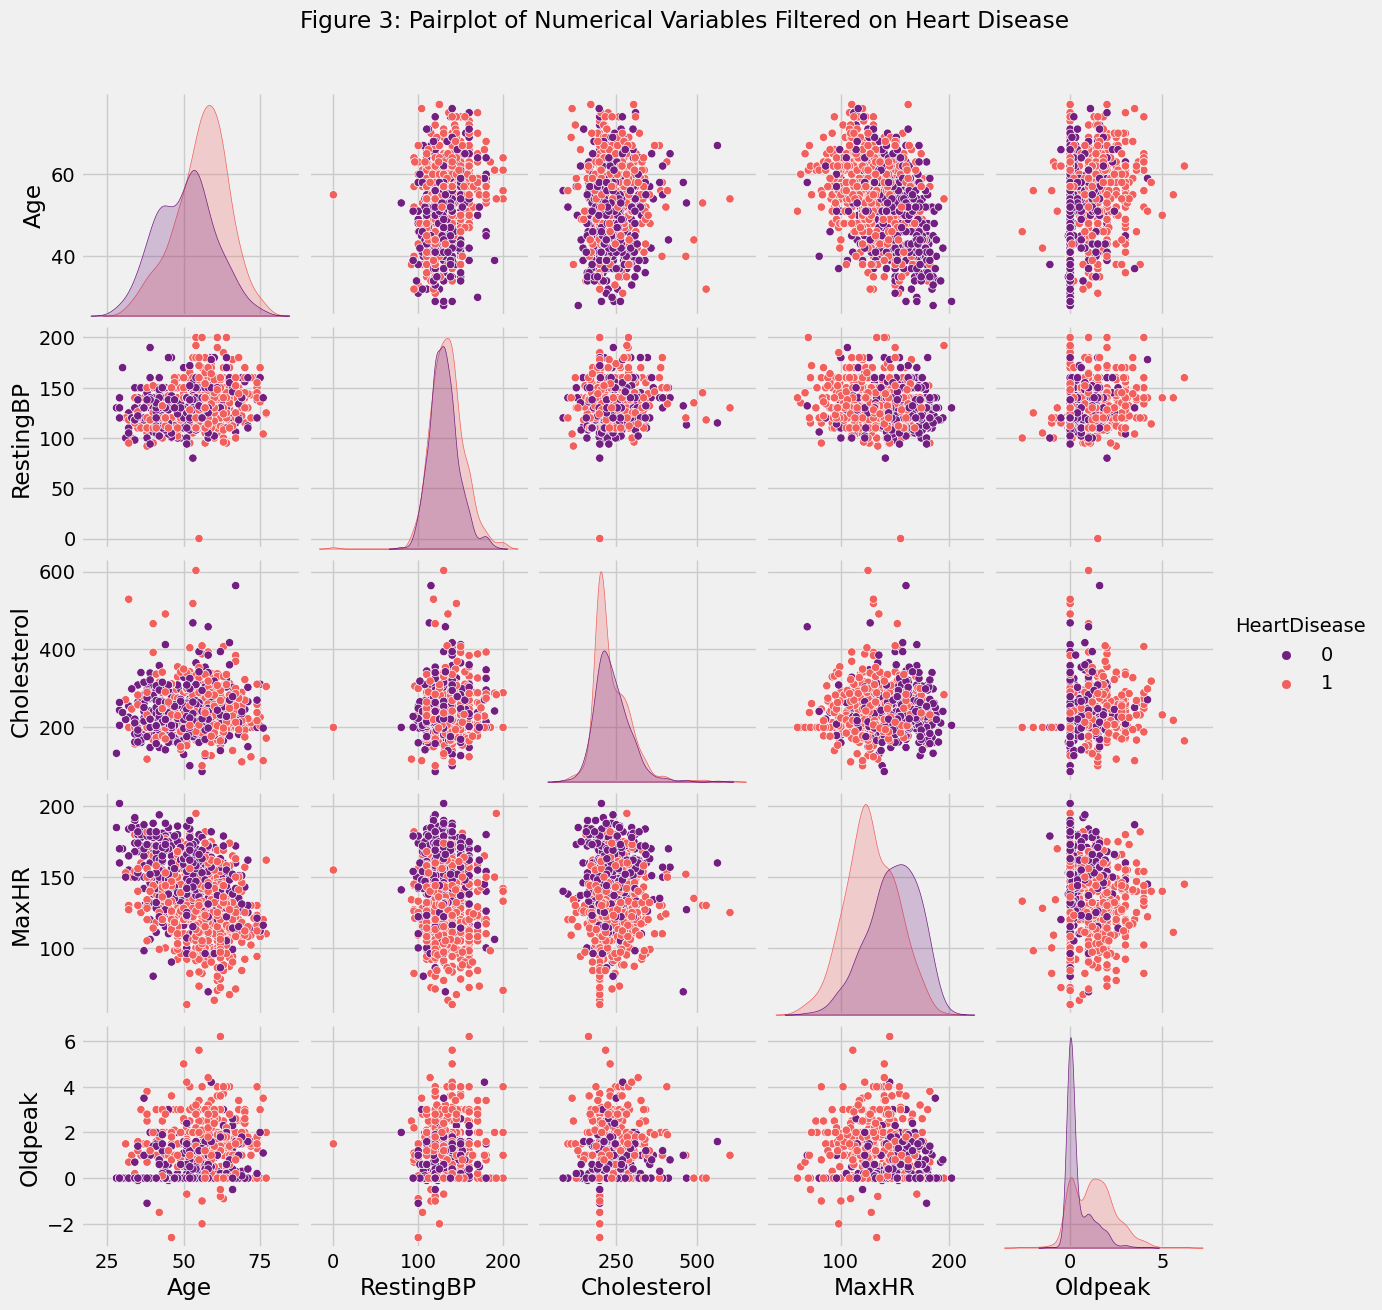

In [149]:
## Now time to look at some predictive measures on Heart Disease
heart_numerical = heart.loc[:,['Age','HeartDisease', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
g = sns.pairplot(heart_numerical, hue = 'HeartDisease', palette='magma');
g.fig.suptitle('Figure 3: Pairplot of Numerical Variables Filtered on Heart Disease', y=1.05);

Let's plot a correlation heatmap. The best predictors tend to be highly correlated with Heart Disease, but have a low correlation between each other.

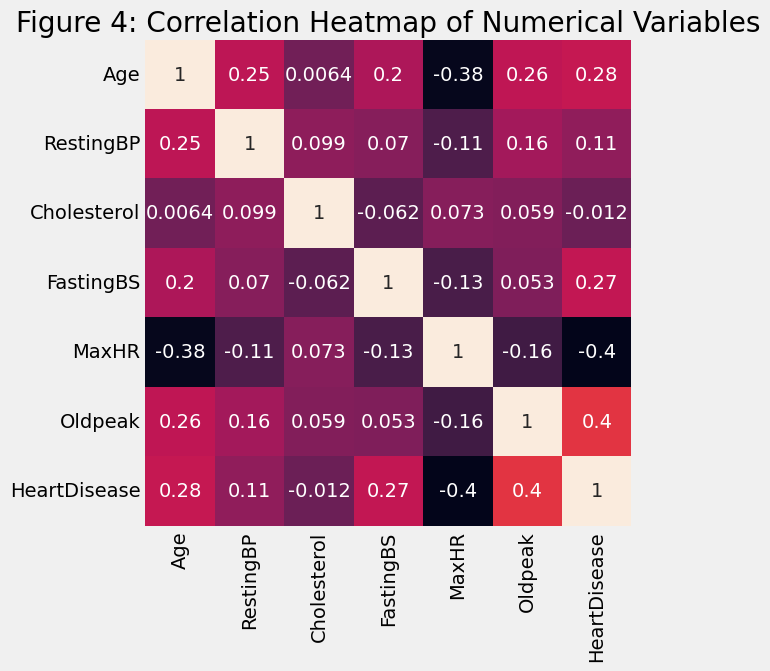

In [150]:
g=sns.heatmap(heart.corr(),square=True, annot=True, cbar=False); # plotting our correlation heatmap
plt.title('Figure 4: Correlation Heatmap of Numerical Variables');

Some thoughts from the correlation heatmap and pairplot:
- The correlation heatmap and pairplot suggest that Heart Disease tends to be more common in the older population.
- Low MaxHR and High Oldpeak appear to have a strong positive correlation with the presence of heart disease.
- Additionally, the pairplot shows that Fasting BS has a moderate positive correlation with heart disease, indicating that elevated fasting blood sugar levels may increase the risk of developing heart disease.

### Multivariate Analysis
PCA, or Principal Component Analysis, is a widely used technique in machine learning for dimensionality reduction. It allows us to identify the most important features or variables in a dataset and reduce the overall dimensionality while still retaining most of the variability in the data. In the case of predicting heart disease, we have a large number of features, including demographic, lifestyle, and clinical factors, which could make it difficult to identify the most important predictors of heart disease. By using PCA, we can reduce the dimensionality of our data and identify the key features that contribute most to heart disease. This, in turn, can help us build better models that are more accurate in predicting the likelihood of heart disease in an individual. PCA can also help us identify any correlations or patterns in the data that may not be immediately apparent, and can help us avoid overfitting our models to noise in the data.

In [151]:
# Choose a class of model: import the PCA function from sk.learn
from sklearn.decomposition import PCA
# Choose model hyperparameters: if I want 2 PC, then set n_components=2
# how many can I have at most?
pca = PCA(n_components=2) 
# notice input for PCA is the feature matrix only, no target
# Fit the model to data by calling the fit() method 
# then infer properties of the data using the transform()
heart_numerical_stad = (heart_numerical - heart_numerical.mean()) / heart_numerical.std() # standardize the data
heart_pca = pca.fit_transform(heart_numerical_stad)

In [152]:
# Percentage of variance explained for each components
print('explained variance ratio (first 2 components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first 2 components): [0.34107991 0.18455406]


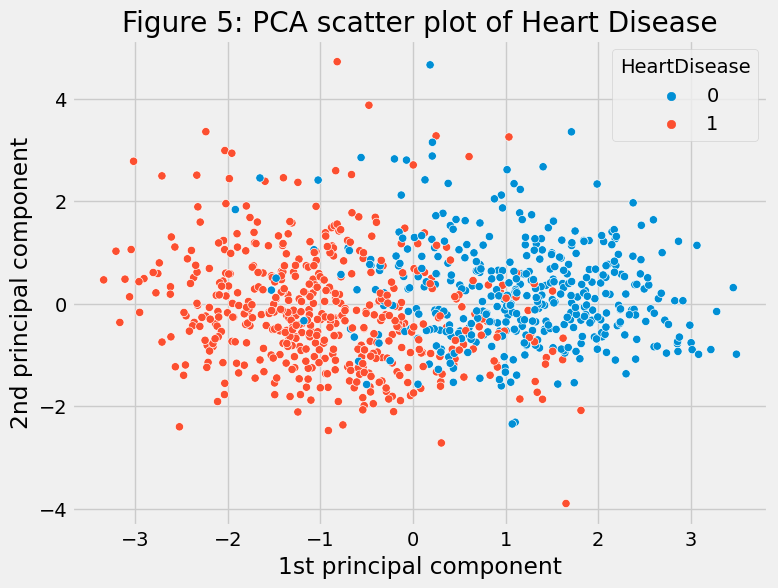

In [166]:
# a color coded scatter plot of the 2 PC!
sns.scatterplot(x=heart_pca[:,0], y=heart_pca[:,1], 
                hue=heart_numerical['HeartDisease'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Figure 5: PCA scatter plot of Heart Disease');

# Methods and Models
### Let's create some models
1) Two-Variable KNN Classification
- KNN (K-Nearest Neighbor) classification is a simple, yet powerful, machine learning algorithm that is often used for solving classification problems. Two-variable KNN classification, also known as bivariate KNN classification, is a variant of KNN that is specifically used for classification tasks that involve only two variables or features.

- One of the main advantages of using KNN classification, and specifically the two-variable variant, is its simplicity and ease of visualization. The algorithm works by finding the K closest data points to a new observation, based on a distance metric, and then classifying the new observation based on the majority class of those K neighbors. This process can be easily visualized on a two-dimensional plot, making it easier to understand and interpret the results.

- Additionally, KNN classification does not make any assumptions about the underlying distribution of the data, making it a versatile and robust algorithm. It can also handle non-linear decision boundaries, making it suitable for complex classification tasks.

2) Logistic Classification
- Logistic regression is a widely used model for medical data analysis because of its simplicity, interpretability, and ability to handle both categorical and continuous input features. It works by modeling the probability of an event (in this case, the presence of heart disease) as a function of the input features. The logistic function ensures that the predicted probabilities are bounded between 0 and 1.

- One of the advantages of logistic regression is that it provides interpretable coefficients for each input feature, which can help clinicians understand the importance of each feature in predicting heart disease. In addition, the model can be easily extended to handle more complex relationships between the input features by including interaction terms or polynomial features.

3) Random Forest Classification
- Random Forest Classifier works by creating multiple decision trees, each using a random subset of the features and data, and then combining the results of each tree to make a final prediction.

- Random Forest Classifier is particularly useful for classification tasks where the features are complex and highly correlated with each other. It can also handle missing data and outliers well. Additionally, it can provide insights into the importance of each feature in making the final prediction.

First, let's sort our data into train and test sets:

In [154]:
### Sort into test and train sets
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(heart, test_size=0.25, random_state=2000)

Let's use a scatterplot to plot our two metrics that will help us classify our patients:
We chose MaxHR and Oldpeak as our metrics, since they are two numerical variables that seem highly correlated to heart disease within our data. The KNN model takes in any two criteria, so feel free to mess around with it so see how other predictors perform when used in the model!

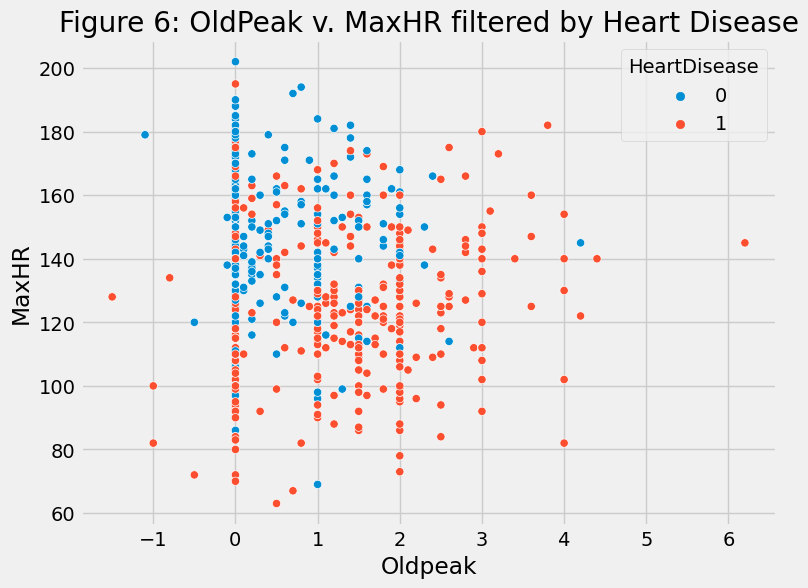

In [155]:
# put in our metrics for our two-variable knn classifier
# these metrics can be changed
metric_1 = 'Oldpeak'
metric_2 = 'MaxHR'
sns.scatterplot(data=heart_train, x=metric_1, y=metric_2, hue='HeartDisease');
plt.title('Figure 6: OldPeak v. MaxHR filtered by Heart Disease');

# Model 1: Two-Variable KNN Classifier
This is a relatively simple model, but let's see how it performs.

Best K for highest test accuracy is:  [7]


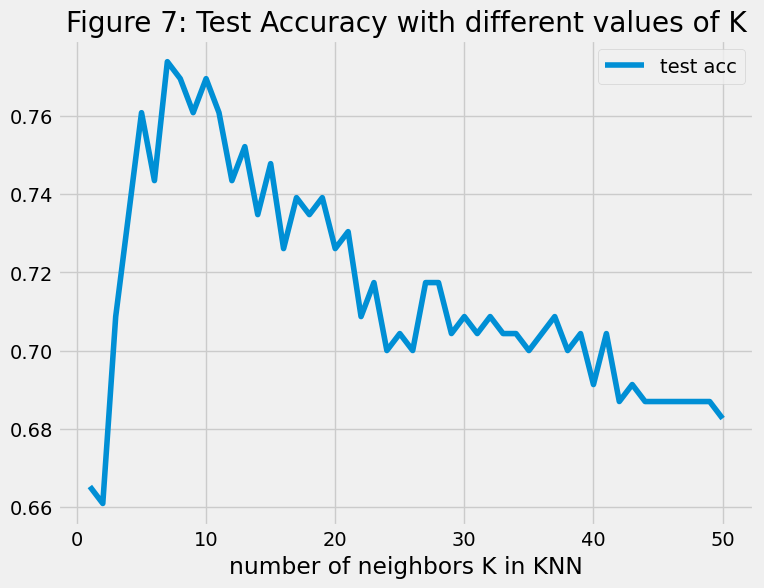

In [156]:
## find best K
y_train = heart_train['HeartDisease']  # sort our data into explanatory and response variables
x_train = heart_train[[metric_1,metric_2]] # our two explanatory variabes we chose earlier
y_test = heart_test['HeartDisease']
x_test = heart_test[[metric_1,metric_2]]
test_acc = []
try_k = np.arange(1,51) # try 50 different values for k
for i in np.arange(1,51):
    knn_class = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    ytesthat = knn_class.predict(x_test)
    test_acc.append(accuracy_score(ytesthat, y_test)) # find our test accuracy for each k
    
KNN_acc =  pd.DataFrame({'number of neighbors K in KNN': try_k,
                       'test acc': test_acc}, index=try_k)
KNN_acc.plot(x='number of neighbors K in KNN', y='test acc') # plot our test values with different values for k
# find the max accuracy
max_test_acc = KNN_acc['test acc'].max()
# find the K corresponds to max accuracy
best_K = KNN_acc.loc[KNN_acc['test acc']==max_test_acc, 'number of neighbors K in KNN'].values
# print out the best K
print('Best K for highest test accuracy is: ', best_K) # choose the best k for test data
#print(max_test_acc)
plt.title('Figure 7: Test Accuracy with different values of K');

In [157]:
# Train a KNN Classifier
knn_class = neighbors.KNeighborsClassifier(n_neighbors=int(best_K))
# fit on training data
knn_class.fit(x_train, y_train)
# make prediction on training data
y_train_hat = knn_class.predict(x_train)

In [158]:
# how many misclassification on training set?
# make prediction on training data
y_hat = knn_class.predict(x_train)
sum(y_train != y_train_hat)

165

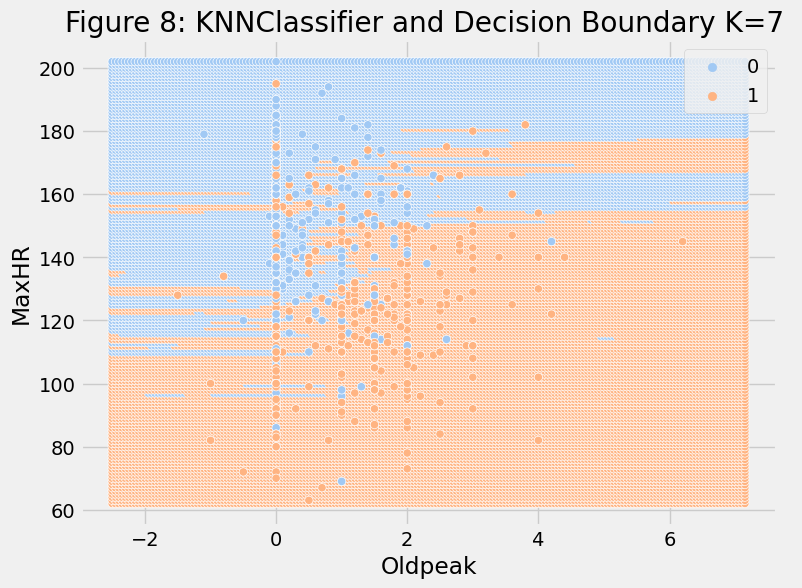

In [159]:
# plot the decision boundary with original data
x1_min, x1_max = x_train.loc[:, metric_1].min()-1, x_train.loc[:, metric_1].max()+1
x2_min, x2_max = x_train.loc[:, metric_2].min()-1, x_train.loc[:, metric_2].max()+1
# expand a grid on X1 and X2 that contains my training data
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 1))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
# use my knn classifier to predict every point on my grid
Z = knn_class.predict(X_grid)

# plot all points on my grid with model prediction
# plot original training data with class label
sns.scatterplot(x=X_grid[:,0], y=X_grid[:,1], hue=Z, palette="pastel")
sns.scatterplot(x=x_train.loc[:, metric_1], y=x_train.loc[:, metric_2], sizes=100, hue=y_train, legend=False, palette="pastel")
plt.xlabel(metric_1)
plt.ylabel(metric_2)
plt.title('Figure 8: KNNClassifier and Decision Boundary K=%i '% best_K);

Our plot shows the decision boundary of our model. It seems to predict Heart Disease fairly well given just two variables, but let's check out the accuracy on our test data, and plot a confusion matrix.

train accuracy score:  0.7601744186046512
test accuracy score:  0.7739130434782608


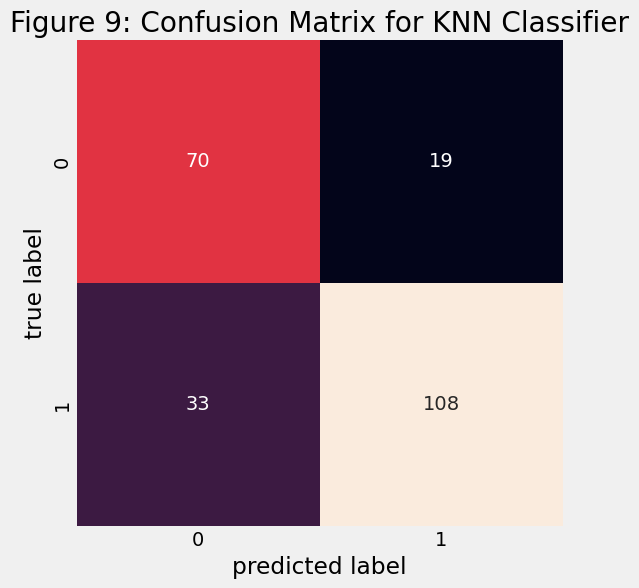

In [160]:
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn

ytrainhat = knn_class.predict(x_train) # our predictions
ytesthat = knn_class.predict(x_test)
train_acc = accuracy_score(y_train_hat, y_train) # compare predictions to truth to get accuracy
test_acc = accuracy_score(ytesthat, y_test)
print('train accuracy score: ', train_acc)
print('test accuracy score: ', test_acc)



from sklearn.metrics import confusion_matrix # import confusion matrix for better visualization
mat = confusion_matrix(y_test, ytesthat)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');
plt.title('Figure 9: Confusion Matrix for KNN Classifier');

Summary: Our Two-Variable KNN Classifier model is a simple and easy-to-visualize model that performed reasonably well, with an accuracy of about 77%. However, while the model's decision boundary is easy to interpret, it may not be the most accurate. To improve our accuracy, we may need to sacrifice some of the interpretability of our model. Overall, while the KNN Classifier has its limitations, it provides a solid starting point for understanding the data and building more complex models in the future.

# Model 2: Logistic Regression Classifier
We will be importing the Logistic Regression ML library from sklearn to perform the logistic classification. We opted for the ML version with train and test data to better compare with our other ML models. Logistic models tend to have decent interpretability as long as there aren't *too* many variables. We used the variables that tended to correlate most strongly to our data, as seen by the correlation heatmap above. We use numerical and categorical (i.e. Sex, Exercise Angina, St_Slope, and Chest Pain Type) data to classify the patients.

Let's run our model!

In [161]:
from sklearn.linear_model import LogisticRegression
heart_train_with_dummies = pd.get_dummies(heart_train) # get_dummies for proper random forest model classification
X_train = heart_train_with_dummies.drop(columns = 'HeartDisease') # x_train is everything but response variable
Y_train = heart_train['HeartDisease'] # y_train is just response variable

heart_test_with_dummies = pd.get_dummies(heart_test) # do the same with test data set
x_test = heart_test_with_dummies.drop(columns = 'HeartDisease')
Y_test = heart_test['HeartDisease']

# create a logistic regression model
model2 = LogisticRegression()

# fit the model on the training data
model2.fit(X_train, Y_train)

# print the coefficients
print(model2.coef_)

# make predictions on the testing data
y_pred = model2.predict(x_test)

from sklearn.metrics import classification_report
# print the classification report
print(classification_report(Y_test, y_pred))

[[ 1.18473344e-02 -1.55900529e-03 -5.34323239e-04  1.06497754e+00
  -8.99301249e-03  3.39396518e-01 -6.41744822e-01  6.24643919e-01
   1.11906706e+00 -6.20509632e-01 -4.29525158e-01 -8.61331727e-02
  -3.13394402e-03 -7.22964007e-02  5.83294417e-02 -5.07436680e-01
   4.90335777e-01 -5.12375683e-02  1.11543466e+00 -1.08129800e+00]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        89
           1       0.91      0.94      0.92       141

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



Accuracy for Logistic Regression model on test data: 0.9043478260869565


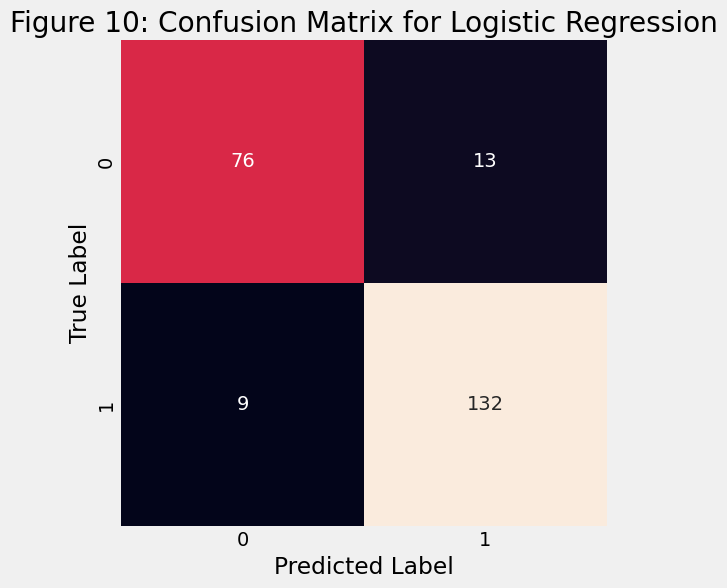

In [162]:
heart_test['predict'] = y_pred

print('Accuracy for Logistic Regression model on test data:',
      ((heart_test['predict']==heart_test['HeartDisease']).sum())/heart_test.shape[0])

from sklearn.metrics import confusion_matrix # create confusion matrix for 2nd model
mat = confusion_matrix(heart_test['HeartDisease'], heart_test['predict'])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label');
plt.title('Figure 10: Confusion Matrix for Logistic Regression');

Summary of Logistic Model:
The logistic classifier model we built for heart disease prediction outperformed our KNN model in terms of accuracy, with a prediction rate of about 90.4%. Although it is slightly less interpretable, this model provides a more reliable prediction of heart disease and could serve as a valuable tool for medical professionals to identify individuals at risk.

# Model 3: Random Forest Classifier
In our final, most complex model, we will predict heart disease with a random forest model. We will be using the sklearn ensemble library to complete the task. First, let's create dummy categorical variables, then run our model with 1000 trees.

In [163]:
from sklearn.ensemble import RandomForestClassifier # run our random forest classifier
model = RandomForestClassifier(n_estimators=1000)
# fit model on training data
model.fit(X_train, Y_train) # use same train data as before for best comparison

RandomForestClassifier(n_estimators=1000)

In [164]:
# make prediction and report accuracy
from sklearn.metrics import accuracy_score
ytrainhat = model.predict(X_train) # use model to predict y on training set and test set
ytesthat = model.predict(x_test)


train_acc = accuracy_score(ytrainhat, Y_train) # compare predicted values to the truth
test_acc = accuracy_score(ytesthat, Y_test)
print('train accuracy score: ', train_acc) # print accuracies
print('test accuracy score: ', test_acc)

train accuracy score:  1.0
test accuracy score:  0.9043478260869565


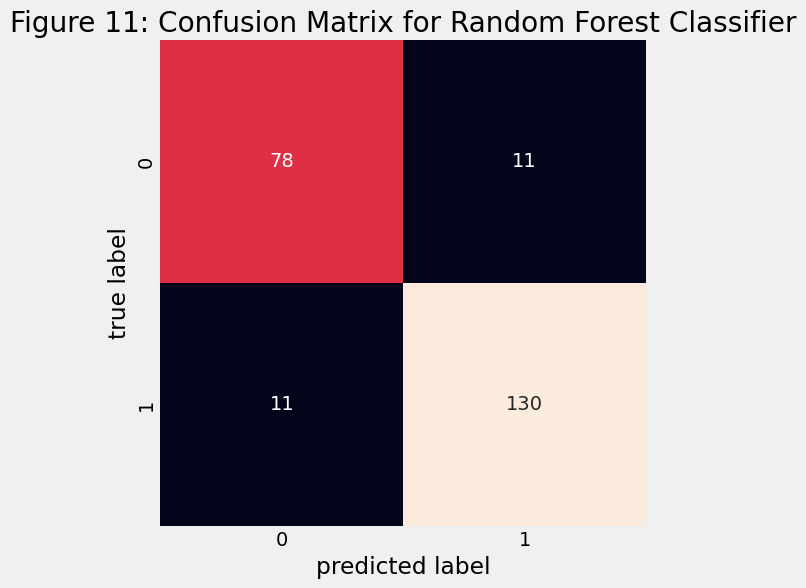

In [165]:
# Let's make a confusion matrix to see how are model did
mat = confusion_matrix(Y_test, ytesthat)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');
plt.title('Figure 11: Confusion Matrix for Random Forest Classifier');

Summary of Random Forest Model:
The Random Forest Classifier model demonstrates remarkable accuracy, similar to the logistic model at about 90%, but at the expense of interpretability due to its complexity. This model is not easily visualized, and it's difficult to interpret the decision-making process, but its high accuracy in predicting heart disease is impressive.

# Results
Our project evolved through several stages of the data science pipeline, and the results of our investigation are significant and far-reaching. We started by gathering a dataset related to heart disease and conducted exploratory data analysis to identify important features. We then used three different machine learning models, including a Two-Variable KNN Classifier, Logistic Classification, and Random Forest Classifier, to predict heart disease. The Logistic Classification model emerged as the most accurate and interpretable, with a success rate of nearly 90%. Our work highlights the power of data science to address critical issues in healthcare and underscores the importance of continued research and innovation in this field.

# Discussion
After evaluating the performance of three machine learning models in predicting heart disease, we have determined that the Logistic Classification model is the most useful. While the Random Forest model also showed similar prediction rates, the interpretability of the Logistic model provides a better understanding of the decision-making process. Moreover, the high accuracy rate of the Logistic model suggests that machine learning can be a powerful tool for detecting heart disease early and possibly improving patient outcomes. The results of this study demonstrate the potential of machine learning in healthcare and highlight the importance of further research in this area.

# Appendix

[Data Source](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)